<a href="https://colab.research.google.com/github/DT6A/JBRamachandran/blob/master/JBRamachandran.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install biopython

In [0]:
import numpy as np
import Bio.PDB as PDB
import matplotlib
import matplotlib.pyplot as plt

from math import pi

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
plt.rcParams["figure.figsize"] = (10,10)

In [0]:
rad_to_deg_scale = 180 / pi

In [0]:
'''
  Draw Ramachandran map
  Arguments:
    phis -- array of phis angles
    psis -- array of psis angles
    show -- show plot at the end of function
    title -- plot title
    legned -- dots legend
  Returns: None
'''
def drawRamachandran(phis, psis, show=True, title=None, legend=None):
  plt.scatter(phis, psis, s=5, label=legend)
  plt.title(title)
  plt.xlabel('$\phi$', fontsize=20)
  plt.ylabel('$\psi$', fontsize=20)
  plt.xlim(-180, 180)
  plt.ylim(-180, 180)
  plt.axhline(0, color='black', linewidth=1)
  plt.axvline(0, color='black', linewidth=1)
  plt.xticks(np.arange(-180, 181, 30))
  plt.yticks(np.arange(-180, 181, 30))
  plt.grid(True)
  plt.annotate(r'$\alpha_r$', (-57, -47), c='black', fontsize=20)
  plt.annotate(r'$\beta$', (-119, 113), c='black', fontsize=20)
  plt.annotate(r'$\alpha_l$', (57, 47), c='black', fontsize=20)
  if show:
    plt.show()

'''
  Evaluate dihedral angles for the Ramachandran map
  Arguments:
    chain -- chain to evaluate
  Returns: tuple of two arrays (phis, psis) angles in rads
'''
def evalRamachandranAngles(chain):
  atoms = list(chain.get_atoms())
  prev_carbon = None
  i = 0
  phis = []
  psis = []

  atoms_len = len(atoms)
  while i < atoms_len:
    atom = atoms[i]
    if atom.get_id() == "N":
      nitrogen_vec = atom.get_vector()
      i += 1
      carbon_a_vec = atoms[i].get_vector()
      i += 1
      carbon = atoms[i]
      while i < atoms_len and atoms[i].get_id() != "N":
        i += 1
      if i == atoms_len:
        break
      next_nitro_vec = atoms[i].get_vector()
      if prev_carbon:
        carbon_vec = carbon.get_vector()
        phis.append(PDB.calc_dihedral(prev_carbon.get_vector(), nitrogen_vec, carbon_a_vec, carbon_vec))
        psis.append(PDB.calc_dihedral(nitrogen_vec, carbon_a_vec, carbon_vec, next_nitro_vec))
      prev_carbon = carbon
    else:
      i += 1
  
  return (phis, psis)

'''
  Process file to build map from
  Arguments:
    file_name -- file name to load compound from
  Returns: tuple of two arrays (phis, psis) in degrees
'''
def processFile(file_name):
  parser = PDB.PDBParser()
  structure = parser.get_structure(file_name[:-4], file_name)
  chains = structure.get_chains()
  
  phis = []
  psis = []

  for chain in chains:
    angles = evalRamachandranAngles(chain)
    phis += angles[0]
    psis += angles[1]

  return (np.array(phis) * rad_to_deg_scale, np.array(psis) * rad_to_deg_scale)


[1DLE](https://www.rcsb.org/structure/1DLE)

[1G8P](https://www.rcsb.org/structure/1G8P)

[3T8H](https://www.rcsb.org/structure/3T8H)

[1E1E](https://www.rcsb.org/structure/1E1E)

In [0]:
files = ['1dle.pdb', '1g8p.pdb', '3t8h.pdb', '1e1e.pdb']

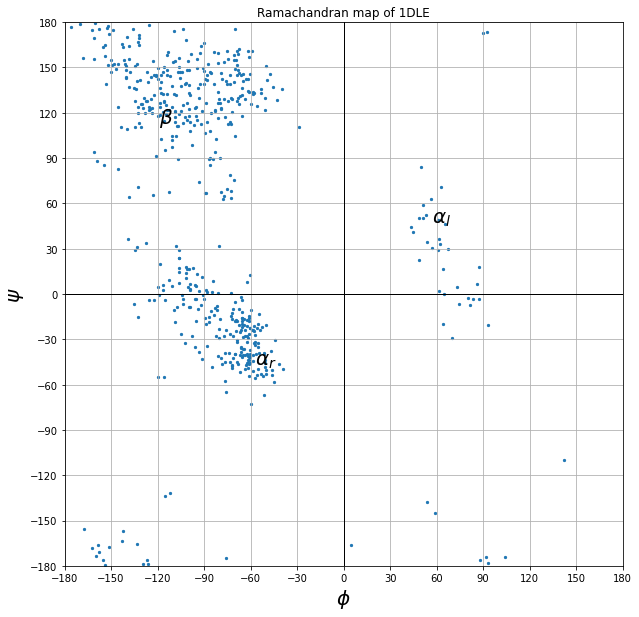

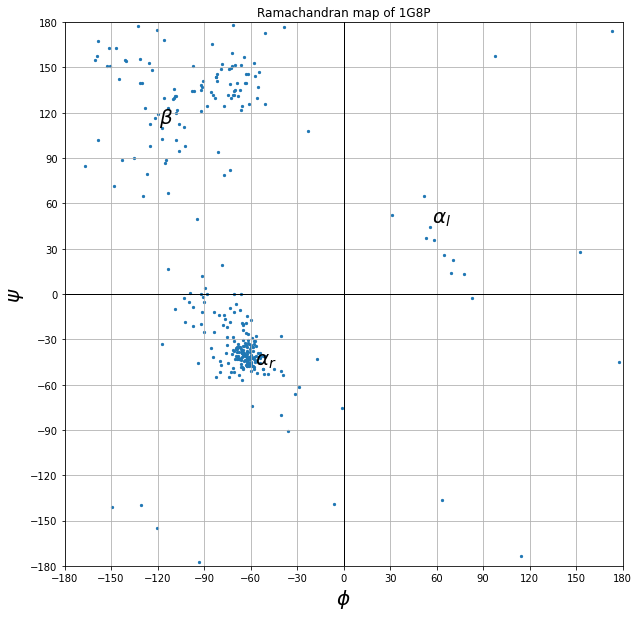

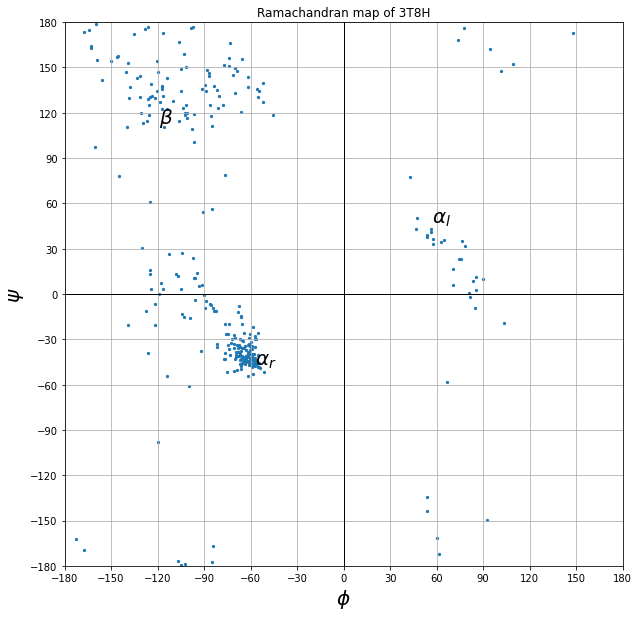

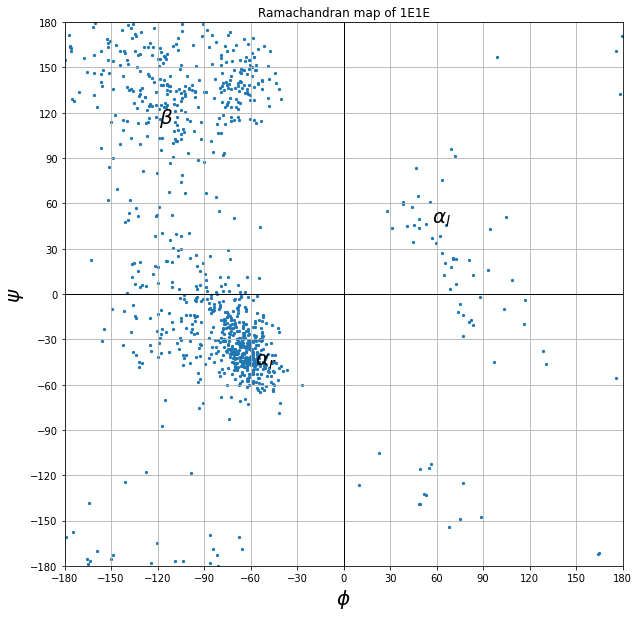

In [12]:
for file in files:
  angles = processFile(file)
  drawRamachandran(angles[0], angles[1], title="Ramachandran map of " + file[:-4].upper())

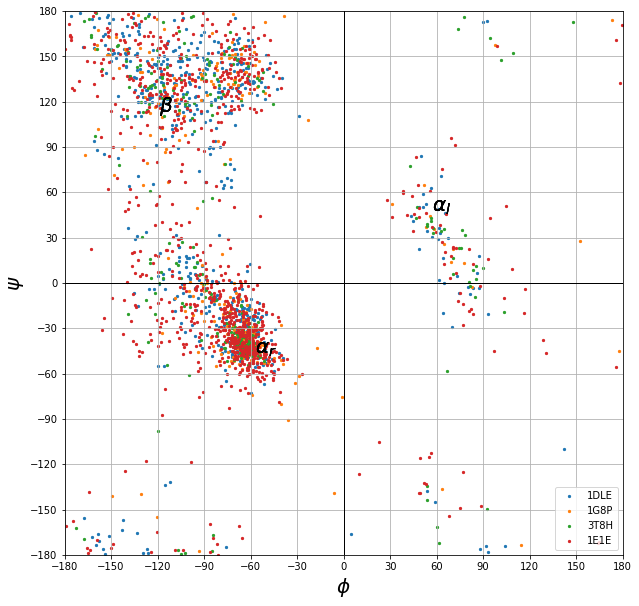

In [13]:
for file in files:
  angles = processFile(file)
  drawRamachandran(angles[0], angles[1], legend=file[:-4].upper(), show=False)
plt.legend()
plt.show()